# Exercise 4.9 Part 2

### Importing analysis and visualization libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Setting path to Achievement 4 master folder
path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 4- Python for DA/DEC23 Instacart Basket Analysis - MASTER FOLDER'
#checking path set correctly
path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 4- Python for DA/DEC23 Instacart Basket Analysis - MASTER FOLDER'

### Importing ords_prods_all df (orders, products, AND customers df from Exercise 4.9.1) as ords_prods_all

In [3]:
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))

In [13]:
ords_prods_all.shape

(32404859, 31)

In [16]:
pd.options.display.max_columns = None

In [17]:
ords_prods_all.tail()

order_id user_id  order_number  orders_day_of_week  \
32404854   1320836  202557            17                   2   
32404855     31526  202557            18                   5   
32404856    758936  203436             1                   2   
32404857   2745165  203436             2                   3   
32404858   3093936  205420             1                   4   

          orders_hour_of_day  days_since_prior_order  first_order  product_id  \
32404854                  15                     1.0        False       43553   
32404855                  11                     3.0        False       43553   
32404856                   7                     NaN         True       42338   
32404857                   5                    15.0        False       42338   
32404858                  14                     NaN         True       28818   

          add_to_cart_order  reordered                   product_name  \
32404854                  2          1            Orange Energy Shots   
32404855                  2          1            Orange Energy Shots   
32404856                  4          0          Zucchini Chips, Pesto   
32404857                 16          1          Zucchini Chips, Pesto   
32404858                  8          0  Hot Oatmeal Multigrain Raisin   

          aisle_id  department_id  prices    price_range_loc    busiest_days  \
32404854        64              7     3.7  Low range product  Regularly busy   
32404855        64              7     3.7  Low range product  Regularly busy   
32404856        50             19     6.9  Mid range product  Regularly busy   
32404857        50             19     6.9  Mid range product    Slowest days   
32404858       130             14    10.3  Mid range product    Slowest days   

         busiest_period_of_day  max_order      loyalty_flag  avg_prod_price  \
32404854           Most orders         31  Regular customer        6.905655   
32404855           Most orders         31  Regular customer        6.905655   
32404856        Average orders          3      New customer        7.631579   
32404857         Fewest orders          3      New customer        7.631579   
32404858           Most orders         16  Regular customer        7.684746   

         spending_type  ordering_behavior     frequency_flag  Gender  \
32404854   Low spender                8.0  Frequent customer  Female   
32404855   Low spender                8.0  Frequent customer  Female   
32404856   Low spender               15.0                NaN    Male   
32404857   Low spender               15.0   Regular_customer    Male   
32404858   Low spender               13.0                NaN    Male   

               STATE  Age date_joined  n_dependants fam_status  income _merge  
32404854   Minnesota   48  10/11/2017             2    married   36899   both  
32404855   Minnesota   48  10/11/2017             2    married   36899   both  
32404856  Washington   52   3/31/2018             2    married  116193   both  
32404857  Washington   52   3/31/2018             2    married  116193   both  
32404858   Tennessee   71  11/12/2019             1    married  142822   both

## 2. Bar Chart, Histogram, Scatterplot and Line Chart in notebook 4.9 - Data visualization with Python

## 3. Create a histogram of the "orders_hour_of_day" column.
Provide Instacart stakeholders with descriptive findings about sales. 

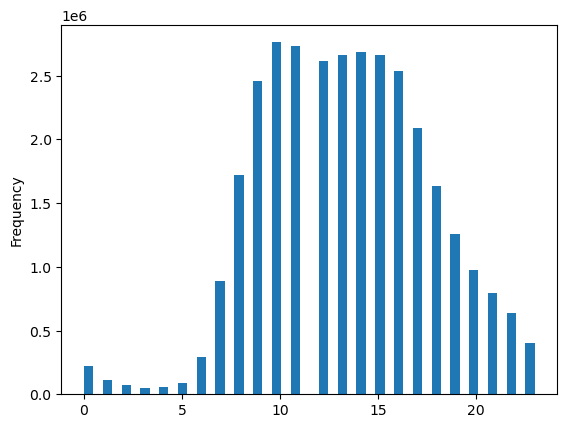

In [8]:
hist_ohod = ords_prods_all['orders_hour_of_day'].plot.hist(bins=48)

We can see the busiest hour for orders is 10am, followed by 11am. 9am to 4pm could be considered peak hours.

The slowest period would be midnight to 5 am, with 3am as the slowest.

In [11]:
# Exporting histogram to Visualizations folder

hist_ohod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ohod.png'))

## 4. Marketing team is curious about distribution of orders among customers in terms of loyalty.
Create a bar chart from the "loyalty_flag" column


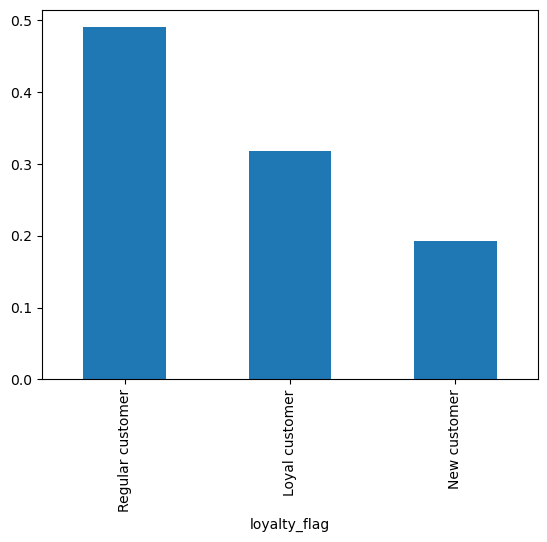

In [19]:
loyalty_bar = ords_prods_all['loyalty_flag'].value_counts(['order_id']).plot.bar()

Distribution of orders among customers by ['loyalty_flag'],
- X axis is proportion of total orders, by ['order_id']

We see that regular customers account for about half of total orders, loyal customers account for just over 30%, and new customers around 20% of total orders.

In [35]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
(Hint: To check this, you need to use an accurate sample for your line chart!)

In [20]:
np.random.seed(24)

In [21]:
#80/20 split

dev = np.random.rand(len(ords_prods_all)) <= 0.8

In [22]:
# a list of T/F's the length of rows in ords_prods_all

dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
# the 80% sample df
big = ords_prods_all[dev]

In [24]:
# the 20% sample df
small = ords_prods_all[~dev]

In [25]:
len(ords_prods_all)

32404859

In [26]:
len(big) + len(small)

32404859

In [27]:
# Reduce samples to only columns necessary for the chart

df_small = small[['orders_hour_of_day', 'prices']]

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

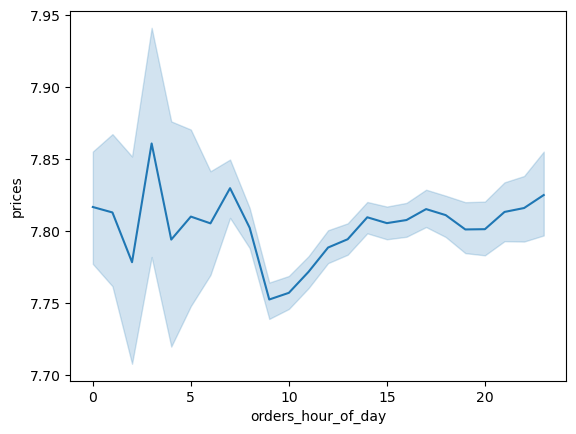

In [28]:
priceline = sns.lineplot(data = df_small, x= 'orders_hour_of_day', y = 'prices')

We can observe high prices as well as high variance during the hours between midnight and 5am that we previously established as the slowest by order traffic.

Prices dip throughout the morning until about 9am, and then graudally rise.

Important to note that the X axis for prices is pretty scoped in throughout - max variance across the predicted range of values is about 25 cents, from 7.70 to 7.95.

In [36]:
priceline.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'priceline_ohod.png'))

## 6. Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.

- First, determine whether there's a connection between age and family situation by creating a line chart exploring the connection between age and number of dependents.

Repeating seed process to make smaller representative sample for which to plot line data.

In [29]:
np.random.seed(9)

In [30]:
dev_1 = np.random.rand(len(ords_prods_all)) <= 0.8

In [31]:
dev_1

array([ True,  True,  True, ..., False,  True, False])

In [32]:
big_1 = ords_prods_all[dev]

In [33]:
small_1 = ords_prods_all[~dev]

In [34]:
df_1 = small_1[['Age', 'n_dependants']]

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

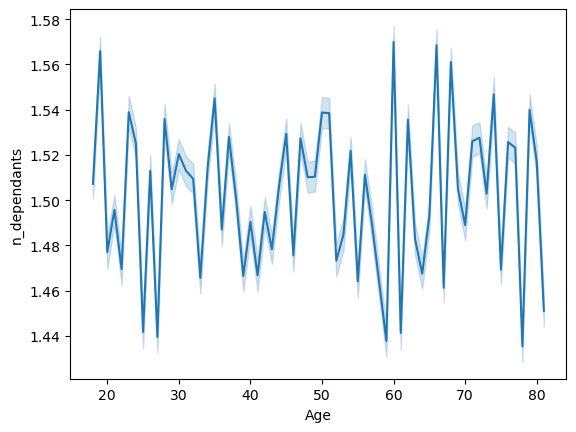

In [39]:
fam_line = sns.lineplot(data = df_1, x = 'Age', y = 'n_dependants')

### There looks to be little correlation between age and number of dependants.

Tempted to rerun this with the big (80%) dataset but from the sample size we see high variance across the ages, and yet the whole graph doesn't stray far from 1.5 for every age. 

In [41]:
fam_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_dependants.png'))

## 7. Explore the connection between age and spending power(income)
-  To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


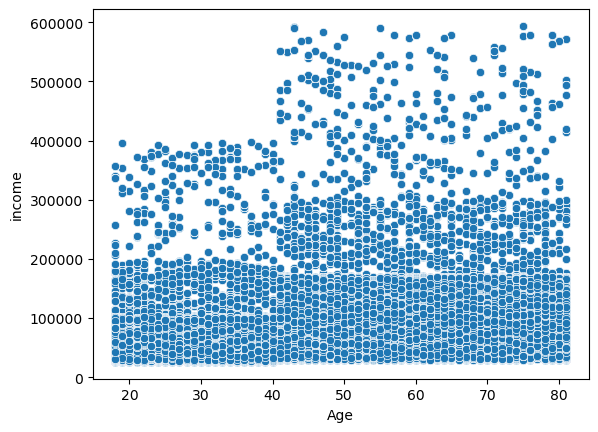

In [42]:
income_age = sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_all)

### Seeing majority of incomes between ~30K-200K, 
- with scattered incomes up to 400K for ages up to ~40, and up to 600K for 40-80.
- thicker distribution between 200K and 300K for ages 40-80 as well

In [43]:
income_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_age_scatterplot.png'))

### That's it for the task!

Going to use this notebook to trim off unneccessary columns:
- [‘max_order’,’avg_prod_price’,’ordering_behavior’,’_merge’]

In [46]:
ords_prods_all = ords_prods_all.drop(columns = ['max_order','avg_prod_price','ordering_behavior','_merge'])

In [47]:
ords_prods_all.tail(10)

order_id user_id  order_number  orders_day_of_week  \
32404849    576295  202557            12                   3   
32404850    960088  202557            13                   4   
32404851    343962  202557            14                   0   
32404852   2329472  202557            15                   6   
32404853    694731  202557            16                   1   
32404854   1320836  202557            17                   2   
32404855     31526  202557            18                   5   
32404856    758936  203436             1                   2   
32404857   2745165  203436             2                   3   
32404858   3093936  205420             1                   4   

          orders_hour_of_day  days_since_prior_order  first_order  product_id  \
32404849                  10                    11.0        False       43553   
32404850                  12                    15.0        False       43553   
32404851                  10                     3.0        False       43553   
32404852                  12                     6.0        False       43553   
32404853                  14                     2.0        False       43553   
32404854                  15                     1.0        False       43553   
32404855                  11                     3.0        False       43553   
32404856                   7                     NaN         True       42338   
32404857                   5                    15.0        False       42338   
32404858                  14                     NaN         True       28818   

          add_to_cart_order  reordered                   product_name  \
32404849                 14          1            Orange Energy Shots   
32404850                  3          1            Orange Energy Shots   
32404851                  2          1            Orange Energy Shots   
32404852                  2          1            Orange Energy Shots   
32404853                  2          1            Orange Energy Shots   
32404854                  2          1            Orange Energy Shots   
32404855                  2          1            Orange Energy Shots   
32404856                  4          0          Zucchini Chips, Pesto   
32404857                 16          1          Zucchini Chips, Pesto   
32404858                  8          0  Hot Oatmeal Multigrain Raisin   

          aisle_id  department_id  prices    price_range_loc    busiest_days  \
32404849        64              7     3.7  Low range product    Slowest days   
32404850        64              7     3.7  Low range product    Slowest days   
32404851        64              7     3.7  Low range product    Busiest days   
32404852        64              7     3.7  Low range product  Regularly busy   
32404853        64              7     3.7  Low range product    Busiest days   
32404854        64              7     3.7  Low range product  Regularly busy   
32404855        64              7     3.7  Low range product  Regularly busy   
32404856        50             19     6.9  Mid range product  Regularly busy   
32404857        50             19     6.9  Mid range product    Slowest days   
32404858       130             14    10.3  Mid range product    Slowest days   

         busiest_period_of_day      loyalty_flag spending_type  \
32404849           Most orders  Regular customer   Low spender   
32404850           Most orders  Regular customer   Low spender   
32404851           Most orders  Regular customer   Low spender   
32404852           Most orders  Regular customer   Low spender   
32404853           Most orders  Regular customer   Low spender   
32404854           Most orders  Regular customer   Low spender   
32404855           Most orders  Regular customer   Low spender   
32404856        Average orders      New customer   Low spender   
32404857         Fewest orders      New customer   Low spender   
32404858           Most orders  Regular customer   Low spender   

 

In [48]:
ords_prods_all.shape

(32404859, 27)

In [49]:
ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))